In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

# Processing time with `pandas`

We've touched a little bit on time so far - mostly how tragic it is to parse - but pandas can do some neat things with it once you figure out how it works.

Let's open up some data from [the Census bureau](https://www.census.gov/econ/currentdata/datasets/) - we're going to use **New Home Sales**. The data is formatted... oddly, so I've done the importing and joining for you below.

In [2]:
data_df = pd.read_excel("RESSALES-mf.xlsx", sheetname='data')
data_df.head()

,per_idx,cat_idx,dt_idx,et_idx,geo_idx,is_adj,val
0,1,1,5,0,1,0,17200.0
1,1,1,2,0,1,0,9.0
2,1,1,3,0,1,0,11.0
3,1,1,4,0,1,0,22.0
4,1,1,1,0,1,0,42.0


In [3]:
categories_df = pd.read_excel("RESSALES-mf.xlsx", sheetname='categories')
data_types_df = pd.read_excel("RESSALES-mf.xlsx", sheetname='data_types')
error_types_df = pd.read_excel("RESSALES-mf.xlsx", sheetname='error_types')
geo_levels_df = pd.read_excel("RESSALES-mf.xlsx", sheetname='geo_levels')
periods_df = pd.read_excel("RESSALES-mf.xlsx", sheetname='periods')

In [4]:
categories_df.head(2)

,cat_idx,cat_code,cat_desc,cat_indent
0,1,SOLD,New Single-family Houses Sold,0
1,2,ASOLD,Annual Rate for New Single-family Houses Sold,0


In [5]:
# it auto-merges cat_idx in our original dataframe with cat_idx in categories_df
# it auto-merges dt_idx in our original dataframe with dt_idx in data_types_df
# it auto-merges geo_idx in our original dataframe with geo_idx in geo_levels_df
# it auto-merges per_idx in our original dataframe with per_idx in periods_df
df = data_df.merge(categories_df).merge(data_types_df).merge(geo_levels_df).merge(periods_df)
# We only want to look at the total number of homes sold across entire the united states
df = df[(df['cat_code'] == 'SOLD') & (df['geo_code'] == 'US') & (df['dt_code'] == 'TOTAL')]

In [6]:
# We don't merge error_types_df because all of the errors are the same
df['et_idx'].value_counts()

0    641
Name: et_idx, dtype: int64

In [7]:
df.head(2)

,per_idx,cat_idx,dt_idx,et_idx,geo_idx,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
4,1,1,1,0,1,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01
14,2,1,1,0,1,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01


In [8]:
# Now let's remove the join columns to keep things clean
df = df.drop(['per_idx', 'cat_idx', 'dt_idx', 'et_idx', 'geo_idx'], axis=1)
df.head()

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
4,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01
14,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01
24,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-03-01
34,0,52.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-04-01
44,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-05-01


In [9]:
# At least we can see 'per_name' (period name) is already a datetime!
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 4 to 15199
Data columns (total 11 columns):
is_adj        641 non-null int64
val           641 non-null float64
cat_code      641 non-null object
cat_desc      641 non-null object
cat_indent    641 non-null int64
dt_code       641 non-null object
dt_desc       641 non-null object
dt_unit       641 non-null object
geo_code      641 non-null object
geo_desc      641 non-null object
per_name      641 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 60.1+ KB


## Changing the index to the datetime

Normally the index of the column is just a number.

In [10]:
df.head(3)

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
4,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01
14,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01
24,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-03-01


It's the column on the far left - `0`, `1`, `2`, `3`, `4`... boring and useless! If we replace the index with the datetime, though, we can start to have some fun

In [11]:
# First we move it over into the index column
df.index = df['per_name']
df.head(2)

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
per_name,,,,,,,,,,,
1963-01-01,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01
1963-02-01,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01


In [12]:
# Then we delete the per_name column because we don't need it any more...
del df['per_name']
df.head(2)

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc
per_name,,,,,,,,,,
1963-01-01,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1963-02-01,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States


## Selecting specific(-ish) dates via the index

Now that our index is a datetime, we can select date ranges much more easily.

In [13]:
# Everything in March, 1963
df['1963-3']

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc
per_name,,,,,,,,,,
1963-03-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States


In [14]:
# Everything in 2010
df['2010']

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc
per_name,,,,,,,,,,
2010-01-01,0,24.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2010-02-01,0,27.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2010-03-01,0,36.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2010-04-01,0,41.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2010-05-01,0,26.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2010-06-01,0,28.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2010-07-01,0,26.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2010-08-01,0,23.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2010-09-01,0,25.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States


## List slices with datetimes

We can also use **list slicing** with datetimes!

Just for review, you can use `:` to only select certain parts of a list:

In [15]:
# Make our list of fruits
ranked_fruits = ('banana', 'orange', 'apple', 'blueberries', 'strawberries')

In [16]:
# Start from the beginning, get the first two
ranked_fruits[:2]

('banana', 'orange')

In [17]:
# Start from two, get up until the fourth element
ranked_fruits[2:4]

('apple', 'blueberries')

In [18]:
# Starting from the third element, get all the rest
ranked_fruits[3:]

('blueberries', 'strawberries')

Instead of using boring ol' numbers, we can use **dates instead**.

In [19]:
# Everything after 2001
df["2001":]

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc
per_name,,,,,,,,,,
2001-01-01,0,72.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2001-02-01,0,85.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2001-03-01,0,94.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2001-04-01,0,84.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2001-05-01,0,80.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2001-06-01,0,79.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2001-07-01,0,76.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2001-08-01,0,74.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2001-09-01,0,66.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States


In [20]:
# Everything between June 1990 and March 1995
df["1990-06":"1995-03"]

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc
per_name,,,,,,,,,,
1990-06-01,0,50.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1990-07-01,0,46.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1990-08-01,0,46.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1990-09-01,0,38.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1990-10-01,0,37.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1990-11-01,0,34.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1990-12-01,0,29.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1991-01-01,0,30.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1991-02-01,0,40.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States


# Info on our time series

If you try to `.plot`, pandas will automatically use the index (the date) as the x axis for you.

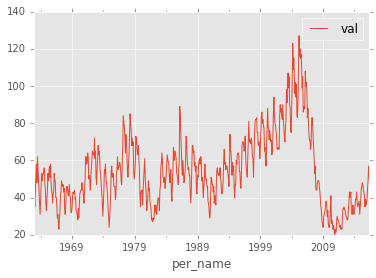

In [21]:
df.plot(y='val')

Hmmm, looks like something might have happened at some point. Maybe we want to see some numbers instead of a graph? To do aggregate statistics on time series in pandas we use a method called `.resample()`, and we're going to tell it **to group the data by year.**

In [22]:
# http://stackoverflow.com/a/17001474 gives us a list of what we can pass to 'resample'
df.resample('A').median()

,cat_indent,is_adj,val
per_name,,,
1963-12-31,0,0,46.0
1964-12-31,0,0,48.5
1965-12-31,0,0,48.5
1966-12-31,0,0,40.0
1967-12-31,0,0,43.5
1968-12-31,0,0,42.0
1969-12-31,0,0,39.5
1970-12-31,0,0,42.5
1971-12-31,0,0,55.0


That still looks like too much data! What about every decade?

In [23]:
# If 'A' is every year, 10A is every 5 years
df.resample('5A').median()

,cat_indent,is_adj,val
per_name,,,
1963-12-31,0,0,46.0
1968-12-31,0,0,44.0
1973-12-31,0,0,47.5
1978-12-31,0,0,55.0
1983-12-31,0,0,44.0
1988-12-31,0,0,56.5
1993-12-31,0,0,50.5
1998-12-31,0,0,64.0
2003-12-31,0,0,78.0


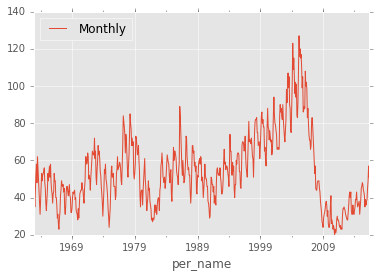

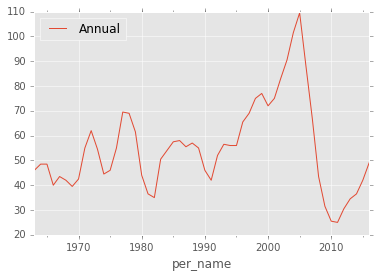

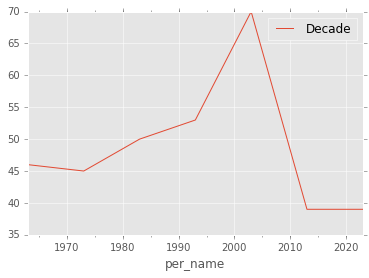

In [24]:
# We can graph these!
df.plot(y='val', label="Monthly")
df.resample('A').median().plot(y='val', label="Annual")
df.resample('10A').median().plot(y='val', label="Decade")

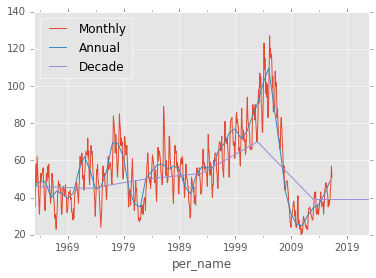

In [25]:
# We can graph these ALL ON THE SAME PLOT!
# we store the 'ax' from the first .plot and pass it to the others
ax = df.plot(y='val', label="Monthly")
df.resample('A').median().plot(y='val', ax=ax, label="Annual")
df.resample('10A').median().plot(y='val', ax=ax, label="Decade")

In [26]:
# Which year had the worst month?
df.resample('A').median()

,cat_indent,is_adj,val
per_name,,,
1963-12-31,0,0,46.0
1964-12-31,0,0,48.5
1965-12-31,0,0,48.5
1966-12-31,0,0,40.0
1967-12-31,0,0,43.5
1968-12-31,0,0,42.0
1969-12-31,0,0,39.5
1970-12-31,0,0,42.5
1971-12-31,0,0,55.0


## Cyclical data

It seems like winter might be a time where not very many houses are sold. Let's see if that's true!

In [27]:
# Group by the month, check the median
df.groupby(by=df.index.month).median()

,is_adj,val,cat_indent
1,0,44.5,0
2,0,50.0,0
3,0,58.0,0
4,0,59.5,0
5,0,58.0,0
6,0,58.0,0
7,0,55.0,0
8,0,56.0,0
9,0,50.0,0
10,0,51.0,0


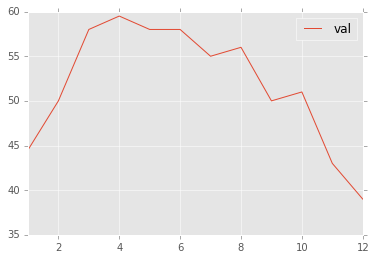

In [28]:
# Group by the month, check the median, plot the results
df.groupby(by=df.index.month).median().plot(y='val')

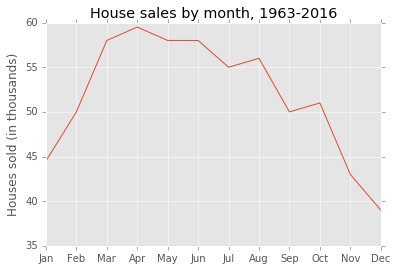

In [29]:
# Group by the month, check the median, plot the results
ax = df.groupby(by=df.index.month).median().plot(y='val', legend=False)
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11, 12])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_ylabel("Houses sold (in thousands)")
ax.set_title("House sales by month, 1963-2016")

# More details

You can also use **max** and **min** and all of your other aggregate friends with `.resample`. For example, what's the largest number of houses hold in a given year?

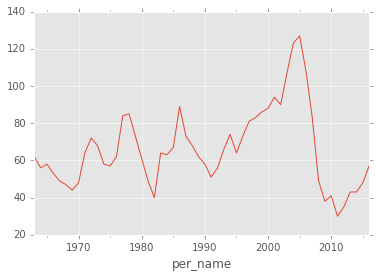

In [30]:
df.resample('A')['val'].max().plot()

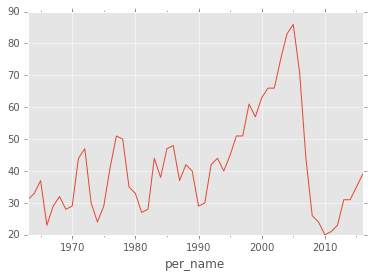

In [31]:
# The fewest?
df.resample('A')['val'].min().plot()

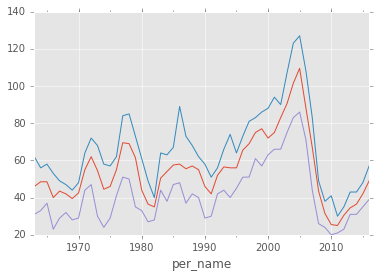

In [32]:
# We now know we can look at the range
ax = df.resample('A')['val'].median().plot()
df.resample('A')['val'].max().plot(ax=ax)
df.resample('A')['val'].min().plot(ax=ax)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  app.launch_new_instance()


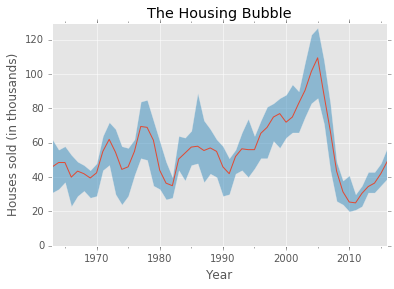

In [33]:
# We now know we can look at the range IN AN EVEN COOLER WAY
ax = df.resample('A')['val'].median().plot()
x_values = df.resample('A').index
min_values = df.resample('A')['val'].min()
max_values = df.resample('A')['val'].max()
ax.fill_between(x_values, min_values, max_values, alpha=0.5)
ax.set_ylim([0,130])
ax.set_ylabel("Houses sold (in thousands)")
ax.set_xlabel("Year")
ax.set_title("The Housing Bubble")